# **Imports**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# **Working on data set**
**cleaning, selecting, filtering, and splitting the data to get best fitting models**

**Here we perform preprocessing on the data**


In [3]:
data = pd.read_csv("/content/insurance.csv")

# elemention of the null values

if data.isnull().sum().sum() :
  data = data.dropna()

# elemention of string values

data['smoker'] = data['smoker'].replace(to_replace=['no' , 'yes'], value=[0,1]) # replace smoker, not smoker into 0 , 1

data = data.drop("region" , 1) # we can drop the region since it is not important in prediction

data = pd.get_dummies(data) # converting each text column into counter columns


# normalization for the data (Scaling column ranges to be between [-1,1])
scaler = StandardScaler()
data['charges'] = scaler.fit_transform(data[['charges']])
data['bmi'] = scaler.fit_transform(data[['bmi']])
data['age'] = scaler.fit_transform(data[['age']])


<ipython-input-3-e77fe86fba91>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data = data.drop("region" , 1) # we can drop the region since it is not important in prediction


**Correlations between each feature and the charges**

<Axes: xlabel='bmi', ylabel='charges'>

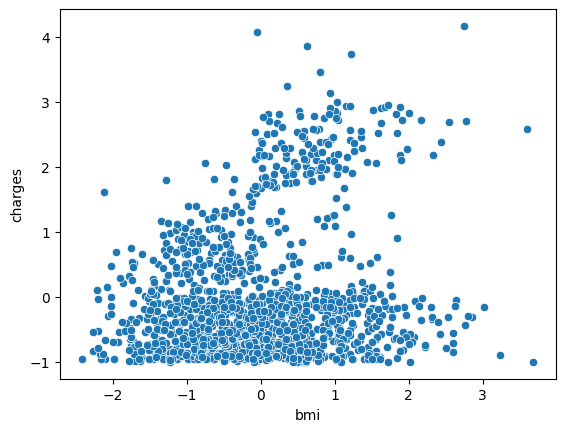

In [4]:
# sns.scatterplot(x="children", y="charges", data=data)
# sns.scatterplot(x="age", y="charges", data=data)
sns.scatterplot(x="bmi", y="charges", data=data)

**Here we select the features and target**

In [5]:
X = data
y = data['charges']
X = X.drop("charges" , 1)

<ipython-input-5-24ccb79c0293>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop("charges" , 1)


**Here we divide the data into train, validate, and test**

In [6]:

# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=1000)

# dividing the training set into training and validation will be useful if
# if we build the algorti


# **Working with models**

**First model is *Linear Regression***

In [7]:
model = LinearRegression() # define instance
model.fit(X_train, y_train) # passing the data and fit it
score = model.score(X_test , y_test) # test the prediction
score

0.765088354265011

**Second model is *Suppor Vector Regressor***

In [8]:
model_2 = SVR(kernel='rbf') # define instance *kenel = 'rbf' to try find non linear separate
model_2.fit(X_train, y_train) # passing the data and fit it
score_2 = model_2.score(X_test , y_test) # test the prediction
score_2

0.8694001511902587

**Third model is *KNN***

In [9]:
model_3 = KNeighborsRegressor(n_neighbors= 5) # define instance
model_3.fit(X_train, y_train) # passing the data and fit it
score_3 = model_3.score(X_test,y_test) # test the prediction
score_3



0.7318471412202132

# **Visualization of the models and comparison between them:**

**Here is a plot that shows each model and its precision using score(R^2 method)**

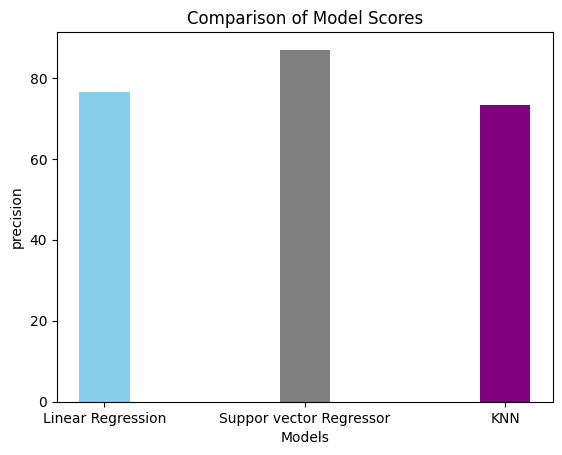

In [10]:
models = ['Linear Regression', 'Suppor vector Regressor',  'KNN']


scores = [score * 100, score_2 * 100, score_3 * 100]

plt.bar(models, scores, color=['skyblue', 'gray', 'purple'], width = 0.25)

plt.xlabel("Models")
plt.ylabel("precision")
plt.title("Comparison of Model Scores")
plt.show()

**Evaluate the models using appropriate regression metrics (e.g., mean absolute error, mean squared error) in addition to R-squared.**

Linear Regression MSE: 0.23481076034872403
SVR MSE: 0.13054376127030876
KNN MSE: 0.2638771821442912


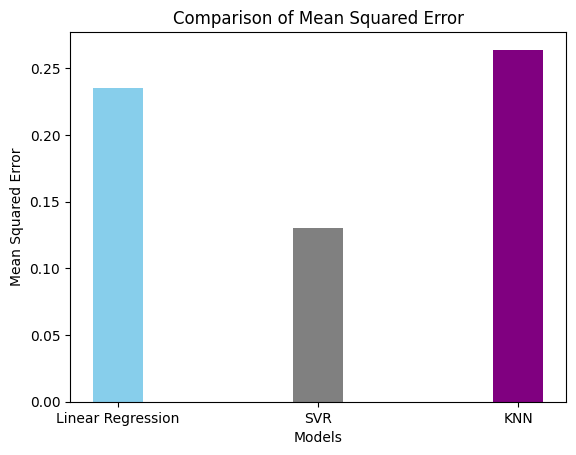

In [11]:
# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")

# SVR
model_2 = SVR(kernel='rbf')
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
mse_2 = mean_squared_error(y_test, y_pred_2)
print(f"SVR MSE: {mse_2}")

# KNN
model_3 = KNeighborsRegressor(n_neighbors= 3)
model_3.fit(X_train, y_train)
y_pred_3 = model_3.predict(X_test) # make predictions
mse_3 = mean_squared_error(y_test, y_pred_3)
print(f"KNN MSE: {mse_3}")

# plot a graph
mse_values = [mse, mse_2, mse_3]

models = ['Linear Regression', 'SVR', 'KNN']

plt.bar(models, mse_values, color=['skyblue', 'gray', 'purple'], width = 0.25)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Mean Squared Error')
plt.show()

**Here is a plot that shows model and its score while training**

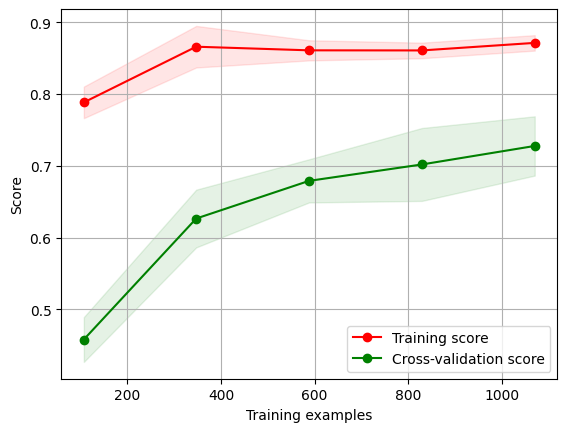

In [12]:
train_sizes, train_scores, test_scores = learning_curve(model_3, X, y)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()